<a href="https://colab.research.google.com/github/sm160388/Capstone-3/blob/main/Copy_of_Shivangi_Mishra%7CCapstone_3%7CHealth_insurance_cross_sell_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

# **Objective**

We need to create a model that can predict, based on the data provided, whether current policyholders are also interested in vehicle insurance provided by the company.



#**Importing the libraries**

In [ ]:
#importing libraries for data handelling
import numpy as np
import pandas as pd
from numpy import math

#importing libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Loading the dataset**

In [ ]:
path= "/content/drive/MyDrive/Copy of TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv"

In [ ]:
df= pd.read_csv(path)

##Data Inspection

In [ ]:
#size of the dataset
df.shape

(381109, 12)

Dataset has 381109 rows and 12 columns.

In [ ]:
#first 5 rows
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
#last 5 rows
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


###Summary of the dataset

In [ ]:
#summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


The dataset has 3 different dtype kinds. They are-- object, int, and float. There are 3 categorical features and the rest are numerical.

###Statistical Details

In [ ]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


###Checking the null values

In [ ]:
# Checking for NUll Values
df.isna().sum().to_frame().rename(columns={0:'Missing Value '})

,Missing Value
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


 No null values found in this dataset.

###Checking Duplicates in the dataset

In [ ]:
#Finding Duplicate values
len(df[df.duplicated()])

0

No Duplicate Values found


#**EXPLORATORY DATA ANALYSIS**

**Target Variable**

In [ ]:
#value count of target variable
df ['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [ ]:
# Percentage For Response Column
(df['Response'].value_counts() / df['Response'].count()) * 100

0    87.743664
1    12.256336
Name: Response, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


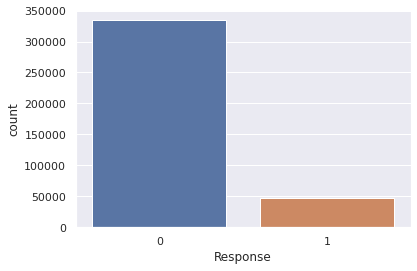

In [ ]:
#plot the count of the target variable
sns.set_theme(style="darkgrid")
sns.countplot(df['Response'], data=df)



*   The data is highly imbalanced.




**Univariate and Bivariate Analysis**

Let us go through variables and analyse them.

**Gender**

In [ ]:
# Percentage of 'Gender' with respect to 'Response'
(df['Gender'].value_counts() / df['Gender'].count()) * 100

Male      54.07613
Female    45.92387
Name: Gender, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


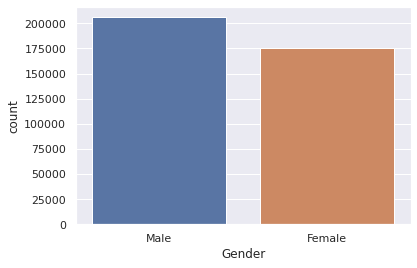

In [ ]:
#countplot of 'Gender'
sns.set_theme(style="darkgrid")
sns.countplot(df['Gender'], data=df)

we see that Males are more interested in buying a insurance rather than females.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


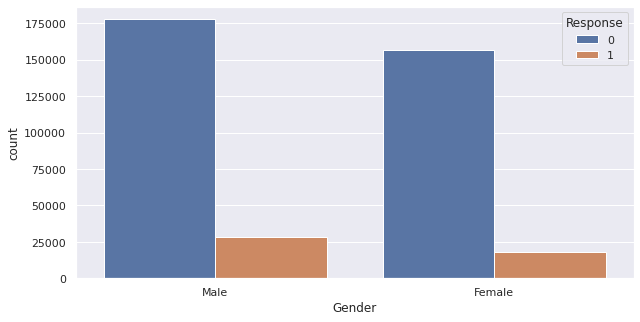

In [ ]:
#Gender vs response
plt.figure(figsize=(10,5))
sns.countplot(df['Gender'],hue=df['Response'],data=df)



*   The gender variable in the dataset is almost equally distributed.

*   Male category is slightly greater than that of female and chances of   buying  the insurance is also little high.
 








**Age**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


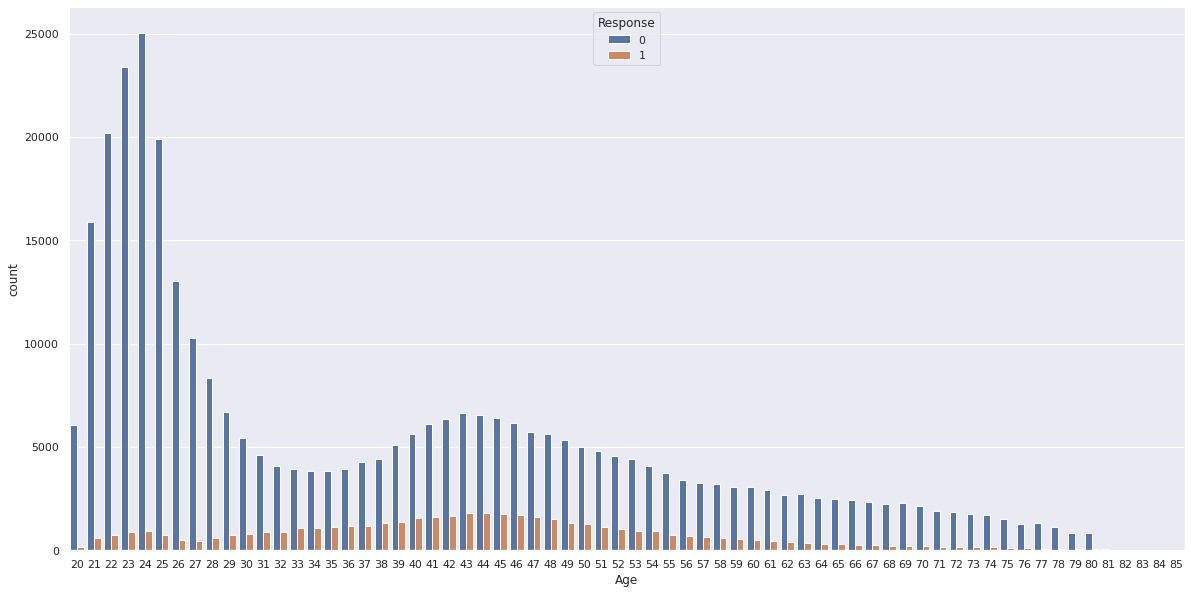

In [ ]:
#age vs response
plt.figure(figsize=(20,10))
sns.countplot(df["Age"],hue=df["Response"],data=df)

**Vehicle Age**

In [ ]:
#value count of 'Vehicle Age"
df["Vehicle_Age"].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


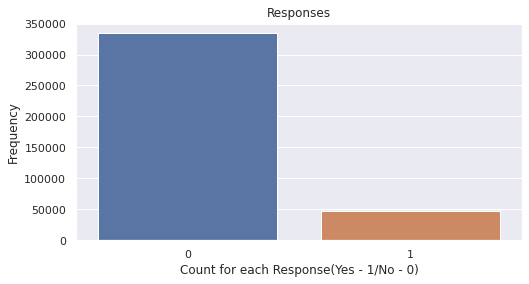

In [ ]:
# Ploting count plot for Vechile Age column

plt.figure(figsize = (8, 4))

sns.countplot(df['Response'])

plt.title('Responses')

plt.xlabel('Count for each Response(Yes - 1/No - 0)')
plt.ylabel('Frequency')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


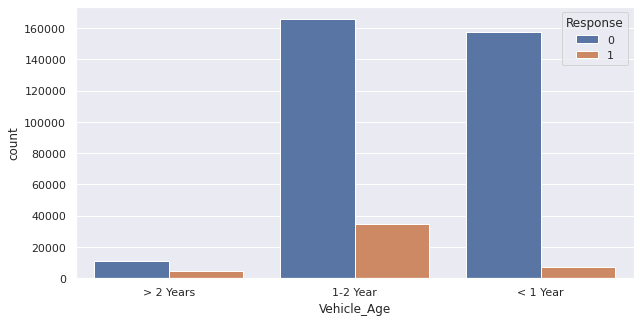

In [ ]:
#countplot of Vehicle Age vs response
plt.figure(figsize=(10,5))
sns.countplot(df['Vehicle_Age'],hue=df['Response'],data=df)


*  95 % of health insurance customers have vehichle that's less than 2 years of age 

*   Customers with vechicle age 1-2 years are more likely to interested as compared to the other two

*   Customers with Vehicle_Age >2 years have very less chance of buying Insurance

**Vehicle Damage**

In [ ]:
#value count of 'Vehicle Damage'
df['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [ ]:
# Percentage For Vechile Damage
(df['Vehicle_Damage'].value_counts() / df['Vehicle_Damage'].count()) * 100

Yes    50.487656
No     49.512344
Name: Vehicle_Damage, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Vechile Damage(Yes/No)')

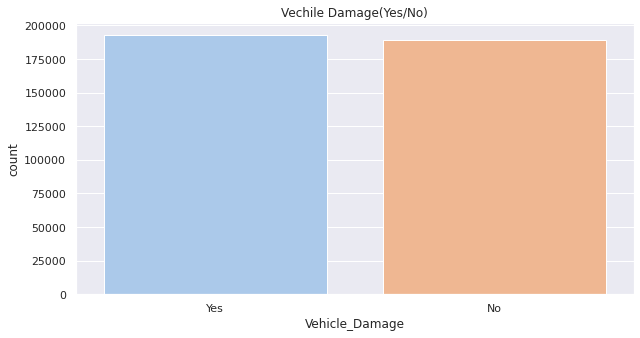

In [ ]:
#plot the count of 'Vehicle Damage'
plt.figure(figsize = (10 ,5))
sns.countplot(df['Vehicle_Damage'], palette = 'pastel')
plt.title('Vechile Damage(Yes/No)')






*   half of the health insurance customer have had their vehicle damaged and half have not.





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


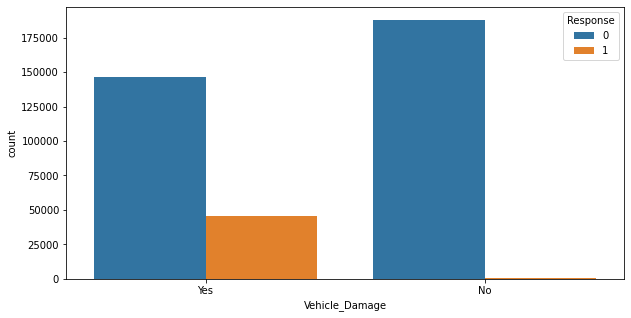

In [ ]:
#countplot of Vehicle Damage vs response
plt.figure(figsize=(10,5))
sns.countplot(df['Vehicle_Damage'],hue=df['Response'],data=df)

**Driving License**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


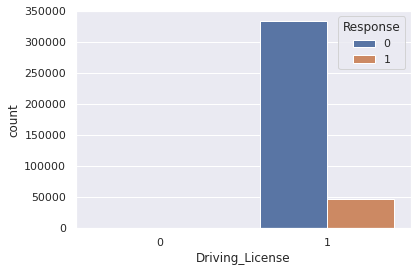

In [ ]:
#Driving license vs Response
sns.countplot(df['Driving_License'],hue=df['Response'])



*   Customers who are interested in Vehicle Insurance almost all have driving license.



**Previously insured**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


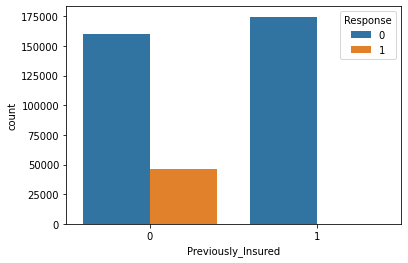

In [ ]:
#previously insured vs response
sns.countplot(df['Previously_Insured'],hue=df['Response']) 

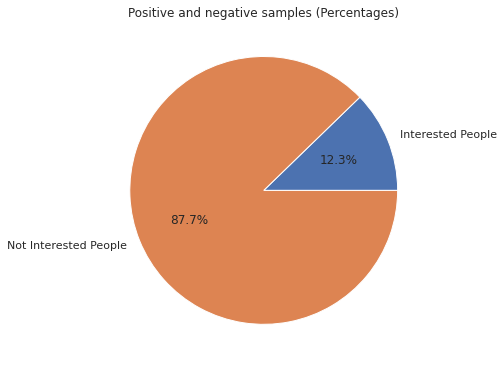

In [ ]:
#Calculating percentage of interested and not interested people for insurance

interested = abs(len(df[df['Response'] == 1])/len(df)*100)

not_interested = abs(len(df[df['Response'] == 0])/len(df)*100)

total_prcentage = [interested, not_interested]

# Creating a pie chart
plt.figure(figsize = (6,8))

plt.pie(total_prcentage, labels = ['Interested People','Not Interested People'], autopct = '%.1f%%')

plt.title('Positive and negative samples (Percentages)')

plt.show()

* Only 12% are interested in purchasing vehicle insurance.
* This is also showing the data imbalance as our response as yes is very less i.e 12% which will lead our model to a biased model.
* We will use Resampling technique to over come this data imbalance.





**Checking for outliers in numerical columns**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


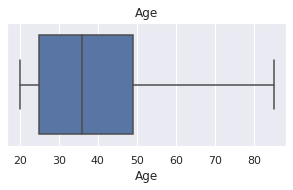

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


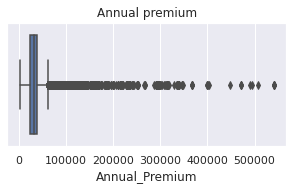

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


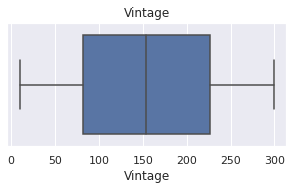

In [ ]:
# Plotting boxplots for checking outliers
plt.figure(figsize=(5,5))
plt.subplot(2,1,2)
sns.boxplot(df['Age'])
plt.title("Age")
plt.show()

plt.figure(figsize=(5,5))
plt.subplot(2,1,2)
sns.boxplot(df['Annual_Premium'])
plt.title("Annual premium")
plt.show()

plt.figure(figsize=(5,5))
plt.subplot(2,1,2)
sns.boxplot(df['Vintage'])
plt.title("Vintage")
plt.show()

**Annual premium has outliers because the premium amount depends on various factors. New and expensive cars generally have high amounts.**

**Annual Premium**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


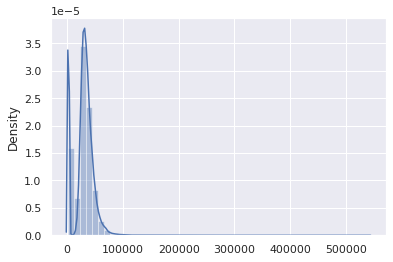

In [ ]:
#plotting distribution for annual premium
sns.distplot(x=df['Annual_Premium']);

* Right Skewed distribution.
* We can apply log transformation to see better.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


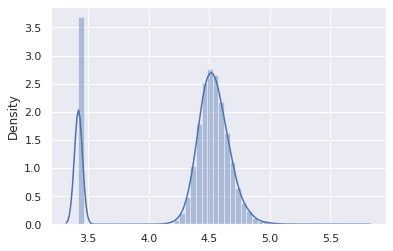

In [ ]:
# After applying log transformation
sns.distplot(x=np.log10(df['Annual_Premium']));

**The distribution looks better now.**

# **FEATURE ENGINEERING**

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#initialize
le = LabelEncoder()
ohe = OneHotEncoder()

#mapping
df["Vehicle_Age"]=df["Vehicle_Age"].map({"> 2 Years":2,"1-2 Year":1,"< 1 Year":0})


#categorical to numerical
df['Gender'] = ohe.fit_transform(df[["Gender"]]).toarray()
df['Vehicle_Age'] = le.fit_transform(df[['Vehicle_Age']])
df['Vehicle_Damage'] = le.fit_transform(df[['Vehicle_Damage']])


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#first 10 rows after encoding
df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0.0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,0.0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,0.0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,0.0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,1.0,29,1,41.0,1,0,0,27496.0,152.0,39,0
5,6,1.0,24,1,33.0,0,0,1,2630.0,160.0,176,0
6,7,0.0,23,1,11.0,0,0,1,23367.0,152.0,249,0
7,8,1.0,56,1,28.0,0,1,1,32031.0,26.0,72,1
8,9,1.0,24,1,3.0,1,0,0,27619.0,152.0,28,0
9,10,1.0,32,1,6.0,1,0,0,28771.0,152.0,80,0


##Feature Selection

In [ ]:
#importing important libraries for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
independent = df.drop(['Response'], axis=1) #Contain all independent variables
dependent = df['Response'] #Contain Dependent variable

In [ ]:
#Finding scores of each feature
f_scores = f_classif(independent, dependent)
f_scores

(array([7.13370735e-01, 1.05091307e+03, 4.76694479e+03, 3.93066928e+01,
        4.25827356e+01, 5.02033540e+04, 1.97325562e+04, 5.47422454e+04,
        1.94317587e+02, 7.51301151e+03, 4.20468707e-01]),
 array([3.98327606e-001, 3.18074235e-230, 0.00000000e+000, 3.62583444e-010,
        6.78391651e-011, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        3.72231514e-044, 0.00000000e+000, 5.16703652e-001]))

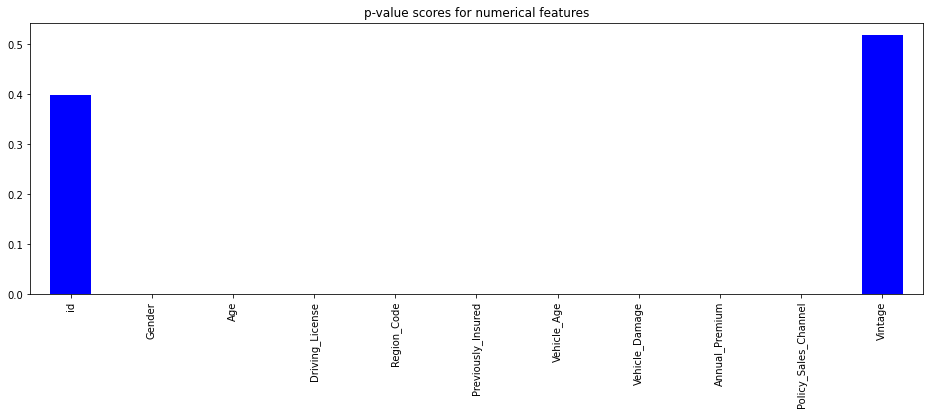

In [ ]:
#The Second array consists of p-values that we need.
p_values = pd.Series(f_scores[1], index= independent.columns)
p_values.plot(kind='bar', color='blue', figsize=(16,5))
plt.title('p-value scores for numerical features')
plt.show()


In [ ]:
#dropping id and vintage column
df.drop(["id","Vintage"],axis=1,inplace=True)

###Correlation of Features

Text(0.5, 1.05, 'Correlation of Features')

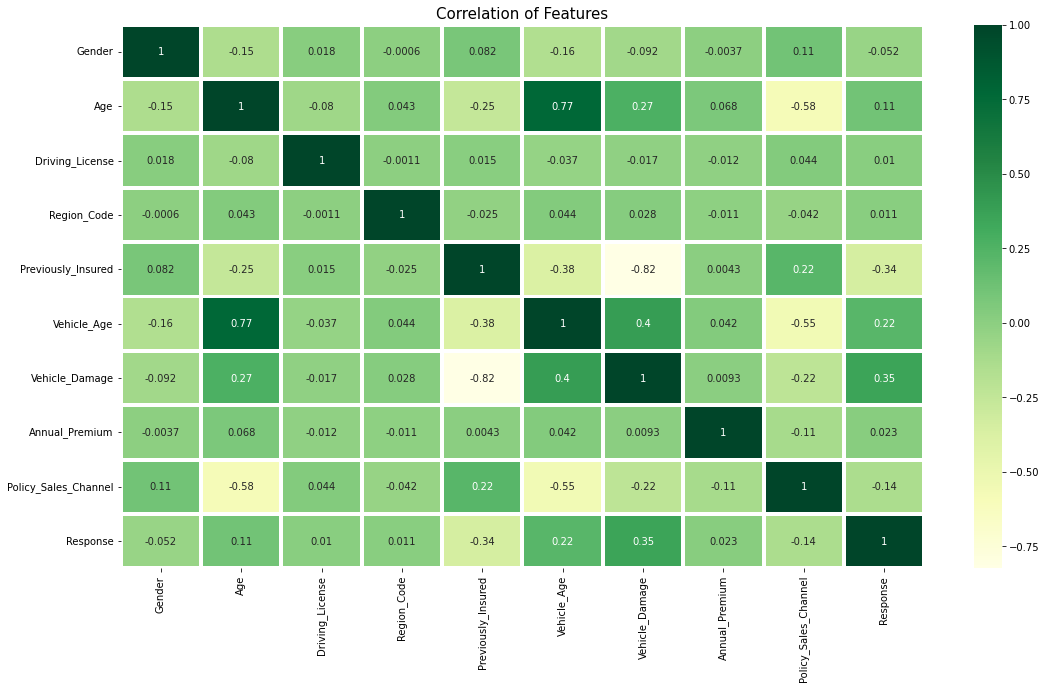

In [ ]:
#correlation
corr = df.corr()

f, ax = plt.subplots(figsize=(18,10))

sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='YlGn')

plt.title("Correlation of Features", y=1.05, size=15)

Observations based on correlation plot:-

*  Previously insured and vechicle_damage have high correlations with dependent variable


In [ ]:
X=df.drop(['Response'],axis=1) #contain all  independent variable
y=df['Response']           #dependent variable

## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting data into Testing and Training datasets
Xtrain,X_test,ytrain,y_test = train_test_split(X,y,test_size=0.20,random_state = 1)

In [ ]:
#Make a list to get most important Features
train_col_list = list(Xtrain.columns)
train_col_list

['Gender',
 'Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Annual_Premium',
 'Policy_Sales_Channel']

In [ ]:
ytrain = ytrain.values.reshape(-1,1)

In [ ]:
y_test = y_test.values.reshape(-1,1)

In [ ]:
ytrain.shape

(304887, 1)

In [ ]:
y_test.shape

(76222, 1)

In [ ]:
#Checking shape of training dataset
Xtrain.shape

(304887, 9)

In [ ]:
#Checking shape of testing dataset
X_test.shape

(76222, 9)

##Using oversampling technique

* As we previously seen that our class data is imbalanced let us use Oversampling techique to balance our data before we go through model building.
* We will use Random Oversampling to balance our data.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

train = RandomOverSampler(random_state = 42)
X_train, y_train = train.fit_resample(Xtrain, ytrain)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_train))
print('Resampled dataset shape', len(X_train))
print('Resampled dataset shape', len(ytrain))
print('Resampled dataset shape', len(Xtrain))

Original dataset shape 381109
Resampled dataset shape 534694
Resampled dataset shape 534694
Resampled dataset shape 304887
Resampled dataset shape 304887


##Feature scaling

In [ ]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The dataset has now been balanced using the oversampling technique, and it is ready for training the model.

# **MODEL TRAINING**

# **1. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
model=LogisticRegression(max_iter = 100)
model=model.fit(X_train,y_train)
pred=model.predict(X_test)

accu_logreg = accuracy_score(y_test,pred)
recall_logreg = recall_score(y_test,pred)
prec_logreg = precision_score(y_test,pred)


#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,pred)*100)
print(classification_report(y_test,pred))
print("Confusion matrix\n", confusion_matrix(y_test,pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


Accuracy :  58.838655506284276
              precision    recall  f1-score   support

           0       1.00      0.53      0.70     67052
           1       0.22      0.99      0.37      9170

    accuracy                           0.59     76222
   macro avg       0.61      0.76      0.53     76222
weighted avg       0.90      0.59      0.66     76222

Confusion matrix
 [[35776 31276]
 [   98  9072]]


# **2. Decission Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)

accu_dtree = accuracy_score(y_test,pred)
recall_dtree = recall_score(y_test,pred)
prec_dtree = precision_score(y_test,pred)


print(accuracy_score(y_test, pred)*100)
print(classification_report(y_test, pred))
print("Confusion matrix\n", confusion_matrix(y_test, pred))


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


86.4514182257091
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     67052
           1       0.01      0.00      0.00      9170

    accuracy                           0.86     76222
   macro avg       0.44      0.49      0.46     76222
weighted avg       0.77      0.86      0.82     76222

Confusion matrix
 [[65885  1167]
 [ 9160    10]]


# **3. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rtree = RandomForestClassifier(n_estimators=120,)
Rtree.fit(X_train, y_train)
pred = Rtree.predict(X_test)

accu_Rtree = accuracy_score(y_test,pred)
recall_Rtree = recall_score(y_test,pred)
prec_Rtree = precision_score(y_test,pred)


print(accuracy_score(y_test, pred)*100)
print(classification_report(y_test, pred))
print("Confusion matrix\n", confusion_matrix(y_test, pred))


82.86059143029571
              precision    recall  f1-score   support

           0       0.91      0.90      0.90     67052
           1       0.31      0.34      0.32      9170

    accuracy                           0.83     76222
   macro avg       0.61      0.62      0.61     76222
weighted avg       0.84      0.83      0.83     76222

Confusion matrix
 [[60018  7034]
 [ 6030  3140]]


# **4. XG Boost**

In [ ]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)
pred = xgb_model.predict(X_test)

accu_xgb = accuracy_score(y_test,pred)
recall_xgb = recall_score(y_test,pred)
prec_xgb = precision_score(y_test,pred)


print(accuracy_score(y_test, pred)*100)
print(classification_report(y_test, pred))
print("Confusion matrix\n", confusion_matrix(y_test, pred))


69.91288604339955
              precision    recall  f1-score   support

           0       0.99      0.67      0.80     67052
           1       0.28      0.93      0.43      9170

    accuracy                           0.70     76222
   macro avg       0.63      0.80      0.61     76222
weighted avg       0.90      0.70      0.75     76222

Confusion matrix
 [[44774 22278]
 [  655  8515]]


# **5. LGBM Classifier**

In [ ]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier()
lgbm.fit(X_train,y_train)
y_pred=lgbm.predict(X_test)

accu_lgbm = accuracy_score(y_test,pred)
recall_lgbm = recall_score(y_test,pred)
prec_lgbm = precision_score(y_test,pred)


print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))


70.4652200152187
              precision    recall  f1-score   support

           0       0.99      0.67      0.80     67052
           1       0.28      0.93      0.43      9170

    accuracy                           0.70     76222
   macro avg       0.63      0.80      0.62     76222
weighted avg       0.90      0.70      0.76     76222

Confusion matrix
 [[45180 21872]
 [  640  8530]]


# **6. Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

accu_gb = accuracy_score(y_test,pred)
recall_gb = recall_score(y_test,pred)
prec_gb = precision_score(y_test,pred)


print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


87.96935268032851
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     67052
           1       0.00      0.00      0.00      9170

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222

Confusion matrix
 [[67052     0]
 [ 9170     0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **7. K Neighbours Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(X_train,y_train)
y_pred=knc.predict(X_test)

accu_knc = accuracy_score(y_test,pred)
recall_knc = recall_score(y_test,pred)
prec_knc = precision_score(y_test,pred)


print("Accuracy:" ,accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


Accuracy: 12.030647319671486
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     67052
           1       0.12      1.00      0.21      9170

    accuracy                           0.12     76222
   macro avg       0.06      0.50      0.11     76222
weighted avg       0.01      0.12      0.03     76222

Confusion matrix
 [[    0 67052]
 [    0  9170]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**We can observe from the above results that Lgbm Classifier and XG Boost Classifier are the top models.**

## Let's perform Cross Validation and Hyper parameter tuning on these models to get better results.

In [ ]:
pip install scikit-optimize 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Hyper parameter tuning on Lgbm

In [ ]:
lgbm = LGBMClassifier()
#Cross validation and hyperparameter tuning
lg_bayes = BayesSearchCV(estimator= lgbm,
                         search_spaces = {
                          'max_depth':Integer(4,100) ,
                          'num_leaves': Integer(3,200),
                          'n_estimators': Integer(3,200),
                          'min_split_gain': Integer(1.0,10.0),
                          'n_jobs': Integer(1,30),
                        },
                       cv = 5, verbose=2, scoring='accuracy', n_iter=10)

lg_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=80, min_split_gain=7, n_estimators=127, n_jobs=20, num_leaves=8; total time=   5.2s
[CV] END max_depth=80, min_split_gain=7, n_estimators=127, n_jobs=20, num_leaves=8; total time=   5.3s
[CV] END max_depth=80, min_split_gain=7, n_estimators=127, n_jobs=20, num_leaves=8; total time=   5.3s
[CV] END max_depth=80, min_split_gain=7, n_estimators=127, n_jobs=20, num_leaves=8; total time=   5.3s
[CV] END max_depth=80, min_split_gain=7, n_estimators=127, n_jobs=20, num_leaves=8; total time=   5.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=22, min_split_gain=6, n_estimators=191, n_jobs=22, num_leaves=81; total time=   9.7s
[CV] END max_depth=22, min_split_gain=6, n_estimators=191, n_jobs=22, num_leaves=81; total time=  10.8s
[CV] END max_depth=22, min_split_gain=6, n_estimators=191, n_jobs=22, num_leaves=81; total time=   9.6s
[CV] END max_depth=22, min_split_gain=6, n_estimators=1

BayesSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=10, scoring='accuracy',
              search_spaces={'max_depth': Integer(low=4, high=100, prior='uniform', transform='normalize'),
                             'min_split_gain': Integer(low=1.0, high=10.0, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=3, high=200, prior='uniform', transform='normalize'),
                             'n_jobs': Integer(low=1, high=30, prior='uniform', transform='normalize'),
                             'num_leaves': Integer(low=3, high=200, prior='uniform', transform='normalize')},
              verbose=2)

In [ ]:
lg_bayes.best_params_

OrderedDict([('max_depth', 58),
             ('min_split_gain', 6),
             ('n_estimators', 121),
             ('n_jobs', 25),
             ('num_leaves', 153)])

In [ ]:
lg_bayes.best_estimator_

LGBMClassifier(max_depth=65, min_split_gain=3, n_estimators=134, n_jobs=10,
               num_leaves=131)

In [ ]:
#make prediction
lgtrain_pred=lg_bayes.best_estimator_.predict(X_train)
lgtest_pred=lg_bayes.best_estimator_.predict(X_test)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train, lgtrain_pred)
test_accuracy = accuracy_score(y_test, lgtest_pred)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8136709968692374
The accuracy on test dataset is 0.710424811734145


In [ ]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train, lgtrain_pred)
test_cm = confusion_matrix(y_test, lgtest_pred)

In [ ]:
# Print the classification report for train and test
print(classification_report(y_train,lgtrain_pred))
print("\n")
print(classification_report(y_test,lgtest_pred))

              precision    recall  f1-score   support

           0       0.93      0.68      0.79    267347
           1       0.75      0.95      0.84    267347

    accuracy                           0.81    534694
   macro avg       0.84      0.81      0.81    534694
weighted avg       0.84      0.81      0.81    534694



              precision    recall  f1-score   support

           0       0.98      0.68      0.81     67052
           1       0.28      0.92      0.43      9170

    accuracy                           0.71     76222
   macro avg       0.63      0.80      0.62     76222
weighted avg       0.90      0.71      0.76     76222



###Roc Curve for Train data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


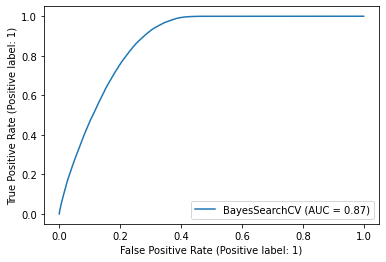

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(lg_bayes, X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


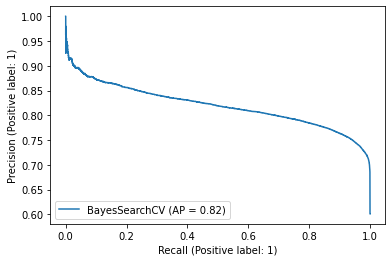

In [ ]:
metrics.plot_precision_recall_curve(lg_bayes, X_train, y_train)

###Roc Curve for Test data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


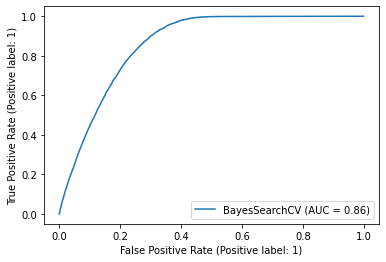

In [ ]:
metrics.plot_roc_curve(lg_bayes, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


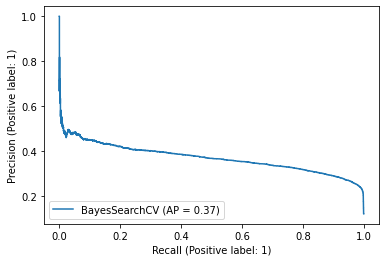

In [ ]:
metrics.plot_precision_recall_curve(lg_bayes, X_test, y_test)

# Hyper-parameter tuning on XG Boost Classifier

In [ ]:
#hyper parameter tuning
xgb_model=xgb.XGBClassifier()
#xgb = XGBoostClassifier()
#Cross validation and hyperparameter tuning
xgb_bayes = BayesSearchCV(estimator= xgb_model,
                         search_spaces = {
                          'max_depth': Integer(2,100),
                          'min_samples_leaf': Integer(1,100),
                          'min_samples_split': Integer(2,100),
                          'n_estimators': Integer(1,140),
                          'max_features': ["auto", "sqrt", "log2"]
                        },
                       cv = 5, verbose=2, scoring='accuracy',n_iter=4)

xgb_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=86, max_features=sqrt, min_samples_leaf=35, min_samples_split=13, n_estimators=91; total time= 9.8min
[CV] END max_depth=86, max_features=sqrt, min_samples_leaf=35, min_samples_split=13, n_estimators=91; total time= 9.9min
[CV] END max_depth=86, max_features=sqrt, min_samples_leaf=35, min_samples_split=13, n_estimators=91; total time= 9.8min
[CV] END max_depth=86, max_features=sqrt, min_samples_leaf=35, min_samples_split=13, n_estimators=91; total time= 9.9min
[CV] END max_depth=86, max_features=sqrt, min_samples_leaf=35, min_samples_split=13, n_estimators=91; total time= 9.8min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=20, n_estimators=97; total time=  14.9s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=20, n_estimators=97; total time=  14.9s
[CV] END max_depth=2, max_features=sqrt

BayesSearchCV(cv=5, estimator=XGBClassifier(), n_iter=4, scoring='accuracy',
              search_spaces={'max_depth': Integer(low=2, high=100, prior='uniform', transform='normalize'),
                             'max_features': ['auto', 'sqrt', 'log2'],
                             'min_samples_leaf': Integer(low=1, high=100, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=100, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=1, high=140, prior='uniform', transform='normalize')},
              verbose=2)

In [ ]:
xgb_bayes.best_params_

OrderedDict([('max_depth', 97),
             ('max_features', 'auto'),
             ('min_samples_leaf', 86),
             ('min_samples_split', 74),
             ('n_estimators', 116)])

In [ ]:
xgb_bayes.best_estimator_

XGBClassifier(max_depth=97, max_features='auto', min_samples_leaf=86,
              min_samples_split=74, n_estimators=116)

In [ ]:
#make prediction
xgbtrain_pred=xgb_bayes.best_estimator_.predict(X_train)
xgbtest_pred=xgb_bayes.best_estimator_.predict(X_test)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train, xgbtrain_pred)
test_accuracy = accuracy_score(y_test, xgbtest_pred)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9847389347926103
The accuracy on test dataset is 0.8242370969011571


In [ ]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train, xgbtrain_pred)
test_cm = confusion_matrix(y_test, xgbtest_pred)

In [ ]:
# Print the classification report for train and test
print(classification_report(y_train,xgbtrain_pred))
print("\n")
print(classification_report(y_test,xgbtest_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    267347
           1       0.97      1.00      0.98    267347

    accuracy                           0.98    534694
   macro avg       0.99      0.98      0.98    534694
weighted avg       0.99      0.98      0.98    534694



              precision    recall  f1-score   support

           0       0.92      0.88      0.90     67052
           1       0.32      0.40      0.36      9170

    accuracy                           0.82     76222
   macro avg       0.62      0.64      0.63     76222
weighted avg       0.84      0.82      0.83     76222



###Roc Curve for Train data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


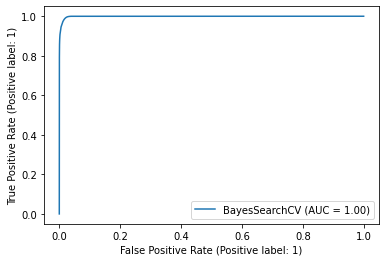

In [ ]:
metrics.plot_roc_curve(xgb_bayes, X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


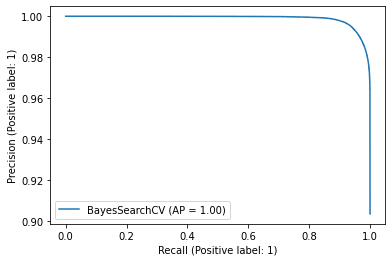

In [ ]:
metrics.plot_precision_recall_curve(xgb_bayes, X_train, y_train)

###Roc Curve for Test data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


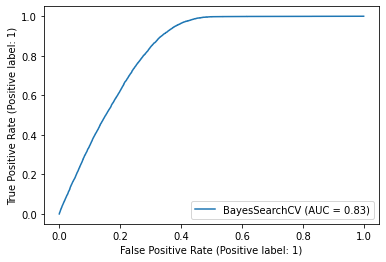

In [ ]:
metrics.plot_roc_curve(xgb_bayes, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


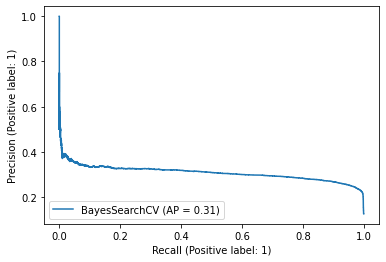

In [ ]:
metrics.plot_precision_recall_curve(xgb_bayes, X_test, y_test)

#Observation

* The ML model for the problem statement was created using python with the help of the dataset, and the ML model created with LGBM and XGBoost classifier performed better than other models.

* In comparison to both models, the LGBM model performed well on the most essential evaluation metric, 'Recall,' on train data and test data. As a result, **we conclude LGBMClassifier is the best model for this dataset**.

###let us highlight the most important features that will be beneficial to the client.

In [ ]:
important_features = lg_bayes.best_estimator_.feature_importances_
important_feat_dict = {'Feature' : train_col_list,
                   'Important Features' : important_features}
important_feat_df = pd.DataFrame(important_feat_dict)

In [ ]:
important_feat_df['Important Features'] = round(important_feat_df['Important Features'],2)

In [ ]:
#Our top feature in descending order
important_feat_df.sort_values(by=['Important Features'],ascending=False)

,Feature,Important Features
7,Annual_Premium,2472
1,Age,1914
3,Region_Code,1844
8,Policy_Sales_Channel,1465
5,Vehicle_Age,206
6,Vehicle_Damage,120
0,Gender,110
4,Previously_Insured,83
2,Driving_License,48


The most significant features are listed from top to bottom.

#Conclusion



* Male customers are more tend to buy vehicle insurance than females.
* The middle-aged customers would be more interested in the insurance offer.
* Customers having a driving license are more prone to convert.
* Those with new vehicles would be more interested in getting insurance.
* The customers who already have vehicle insurance won’t be interested in getting another.
* If the Customer got his/her vehicle damaged in the past, they would be more interested in buying insurance.
* We can see that **LGBM model perform better** for this dataset.
 



#Challenges faced


* Handling large dataset
* Already available methods of hyper parameter tuning were taking a huge amount of time to process.
* Memory Optimization during hyper parameter tuning.


